In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import os
os.chdir('/content/drive/MyDrive/FBLA_Data_Analysis')

In [4]:
data = pd.read_csv('/content/drive/MyDrive/FBLA_Data_Analysis/State_Washington_Electric_Vehicle_Title_Registration_Activity.csv')

In [5]:
data

,Clean Alternative Fuel Vehicle Type,VIN (1-10),DOL Vehicle ID,Model Year,Make,Model,Vehicle Primary Use,Electric Range,Odometer Reading,Odometer Code,...,Meets 2019 HB 2042 Sale Price/Value Requirement,2019 HB 2042: Battery Range Requirement,2019 HB 2042: Purchase Date Requirement,2019 HB 2042: Sale Price/Value Requirement,Electric Vehicle Fee Paid,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid,2020 Census Tract,Legislative District,Electric Utility
0,Battery Electric Vehicle (BEV),7SAYGDEF6N,197458138,2022,TESLA,Model Y,Passenger,0,0,Odometer reading is not collected at time of r...,...,False,No battery range,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.306701e+10,22.0,PUGET SOUND ENERGY INC
1,Battery Electric Vehicle (BEV),KNDCC3LG2N,177586440,2022,KIA,Niro,Passenger,0,20,Actual Mileage,...,False,No battery range,Meets purchase date requirement,Sale price too high,Not Applicable,Not Applicable,Not Applicable,5.306701e+10,22.0,PUGET SOUND ENERGY INC
2,Battery Electric Vehicle (BEV),KNDCC3LG2N,177586440,2022,KIA,Niro,Passenger,0,0,Odometer reading is not collected at time of r...,...,False,No battery range,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.306701e+10,22.0,PUGET SOUND ENERGY INC
3,Plug-in Hybrid Electric Vehicle (PHEV),1G1RD6E43E,205937539,2014,CHEVROLET,Volt,Passenger,38,62742,Actual Mileage,...,False,Meets battery range requirement,Sale before August 2019,Non-sale,Not Applicable,Not Applicable,Not Applicable,5.306701e+10,22.0,PUGET SOUND ENERGY INC
4,Plug-in Hybrid Electric Vehicle (PHEV),1G1RD6E43E,205937539,2014,CHEVROLET,Volt,Passenger,38,0,Odometer reading is not collected at time of r...,...,False,Meets battery range requirement,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.306701e+10,22.0,PUGET SOUND ENERGY INC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720261,Battery Electric Vehicle (BEV),5YJ3E1EC9P,233699714,2023,TESLA,Model 3,Passenger,0,0,Odometer reading is not collected at time of r...,...,False,No battery range,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.303301e+10,37.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
720262,Battery Electric Vehicle (BEV),5YJ3E1EB7N,230274495,2022,TESLA,Model 3,Passenger,0,0,Odometer reading is not collected at time of r...,...,False,No battery range,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.306301e+10,6.0,BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...
720263,Plug-in Hybrid Electric Vehicle (PHEV),3FA6P0PU5H,338354964,2017,FORD,Fusion,Passenger,21,0,Odometer reading is not collected at time of r...,...,False,Low battery range,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,Yes,5.305307e+10,26.0,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
720264,Battery Electric Vehicle (BEV),5YJ3E1EA1N,212094242,2022,TESLA,Model 3,Passenger,0,15,Actual Mileage,...,False,No battery range,Meets purchase date requirement,Sale price too high,Not Applicable,Not Applicable,Not Applicable,5.306105e+10,10.0,BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...


In [6]:
data.dtypes

Clean Alternative Fuel Vehicle Type                                object
VIN (1-10)                                                         object
DOL Vehicle ID                                                      int64
Model Year                                                          int64
Make                                                               object
Model                                                              object
Vehicle Primary Use                                                object
Electric Range                                                      int64
Odometer Reading                                                    int64
Odometer Code                                                      object
New or Used Vehicle                                                object
Sale Price                                                          int64
Sale Date                                                          object
Base MSRP                             

In [7]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [8]:
data.dtypes

clean_alternative_fuel_vehicle_type                                object
vin_(1-10)                                                         object
dol_vehicle_id                                                      int64
model_year                                                          int64
make                                                               object
model                                                              object
vehicle_primary_use                                                object
electric_range                                                      int64
odometer_reading                                                    int64
odometer_code                                                      object
new_or_used_vehicle                                                object
sale_price                                                          int64
sale_date                                                          object
base_msrp                             

In [9]:
data['county'].value_counts()

King           388346
Snohomish       78888
Pierce          54373
Clark           39704
Kitsap          25421
                ...  
Yavapai             1
Doña Ana            1
Hudson              1
Lafayette           1
Mecklenburg         1
Name: county, Length: 310, dtype: int64

In [10]:
data['county'].value_counts().value_counts()

2       48
1       44
3       33
4       20
6       17
        ..
1116     1
1412     1
1718     1
1808     1
98       1
Name: county, Length: 77, dtype: int64

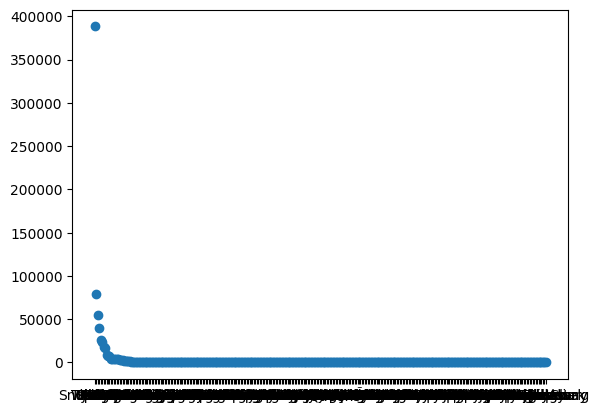

In [11]:
x = data['county'].value_counts().index
y = data['county'].value_counts().values

# colors = np.array([0, 10, 20, 30, 40, 45, 50, 55, 60, 70, 80, 90, 100])

# plt.scatter(x, y, c=colors, cmap='viridis')
plt.scatter(x, y)

plt.show()

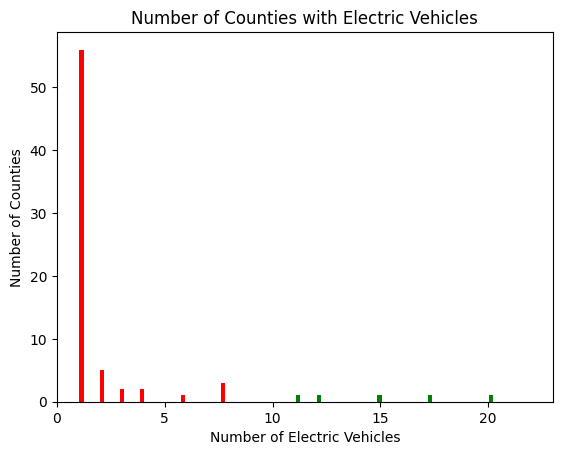

In [12]:
county_data = data['county'].value_counts().value_counts()

optimal_d = county_data[county_data <= 10]
non_optimal_d = county_data[county_data > 10]

plt.hist([optimal_d, non_optimal_d], color=['red', 'green'], bins=100)

plt.xlabel('Number of Electric Vehicles')
plt.ylabel('Number of Counties')
plt.title('Number of Counties with Electric Vehicles')

ax = plt.gca()
ax.set_xlim(left = 0, right = 23)
ax.set_ylim(bottom = 0)
plt.show()

In [13]:
# sns.histplot(x = data['county'].value_counts())
# plt.xlabel('Number of Counties with EVs')
# plt.ylabel('Number of EV Cars')
# plt.title('Number of Counties')
# ax = plt.gca()
# ax.set_xlim(left = 0, right = 100)
# ax.set_ylim(bottom = 0)
# plt.show()

In [14]:
data['city'].value_counts().value_counts()

1       162
2       148
3        96
4        71
5        51
       ... 
1030      1
1032      1
1059      1
1091      1
350       1
Name: city, Length: 297, dtype: int64

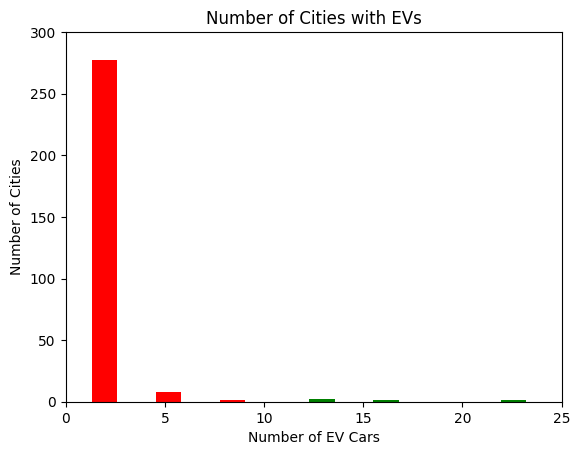

In [15]:
city_data = data['city'].value_counts().value_counts()

optimal_d = city_data[city_data <= 10]
non_optimal_d = city_data[city_data > 10]

plt.hist([optimal_d, non_optimal_d], color=['red', 'green'], bins=50)

plt.title('Number of Cities with EVs')
plt.xlabel('Number of EV Cars')
plt.ylabel('Number of Cities')
ax = plt.gca()
ax.set_xlim(left = 0, right = 25)
ax.set_ylim(bottom = 0, top = 300)
plt.show()

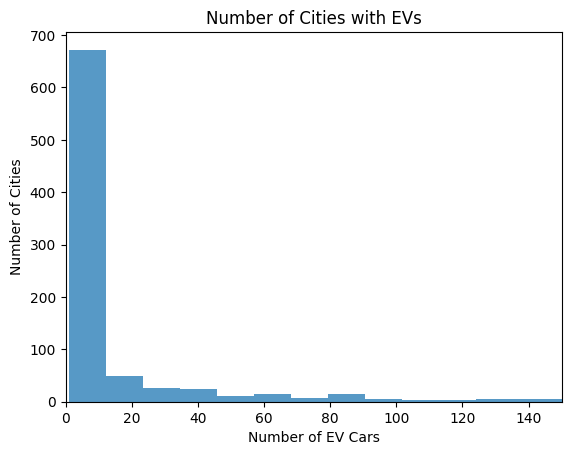

In [16]:
sns.histplot(x=data['city'].value_counts())
plt.title('Number of Cities with EVs')
plt.xlabel('Number of EV Cars')
plt.ylabel('Number of Cities')
ax = plt.gca()
ax.set_xlim(left = 0, right = 150)
ax.set_ylim(bottom = 0)
plt.show()

In [17]:
county_data

2       48
1       44
3       33
4       20
6       17
        ..
1116     1
1412     1
1718     1
1808     1
98       1
Name: county, Length: 77, dtype: int64

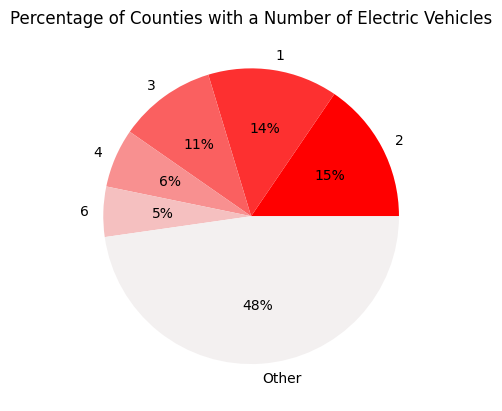

In [18]:
county_counts = data['county'].value_counts()
county_counts_summary = county_counts.value_counts()

county_data = county_counts_summary.head(5)
county_reminiscence = county_counts_summary[5:]

combined_counts = pd.concat([county_data, pd.Series([county_reminiscence.sum()], index=['Other'])])

palette_color = sns.color_palette("light:r_r")

plt.pie(combined_counts, labels=combined_counts.index, colors=palette_color, autopct='%.0f%%')

plt.title('Percentage of Counties with a Number of Electric Vehicles')
plt.show()

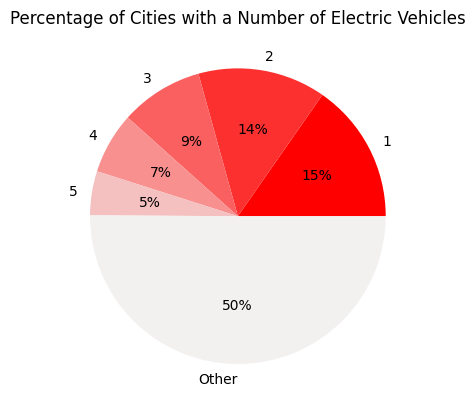

In [19]:
city_counts = data['city'].value_counts()
city_counts_summary = city_counts.value_counts()

city_data = city_counts_summary.head(5)
city_reminiscence = city_counts_summary[5:]

combined_counts = pd.concat([city_data, pd.Series([city_reminiscence.sum()], index=['Other'])])

plt.pie(combined_counts, labels=combined_counts.index, colors=palette_color, autopct='%.0f%%')

plt.title('Percentage of Cities with a Number of Electric Vehicles')
plt.show()